In [91]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [92]:
df = pd.read_csv(r'C:\Users\hb292\Downloads\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Blue:No Diabeties , Red:Diabeties


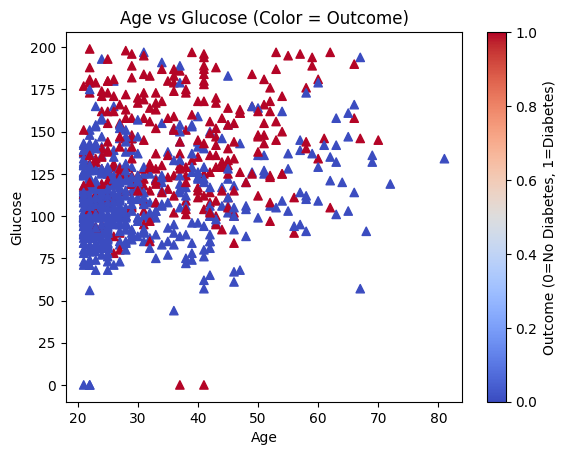

In [93]:
print("Blue:No Diabeties , Red:Diabeties")
plt.scatter(df.Age, df.Glucose, c=df.Outcome, cmap='coolwarm', marker='^')
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title("Age vs Glucose (Color = Outcome)")
plt.colorbar(label='Outcome (0=No Diabetes, 1=Diabetes)')
plt.show()

In [94]:
df.shape

(768, 9)

In [95]:
from sklearn.model_selection import train_test_split
X = df[['Age','Glucose']]
Y = df.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [96]:
X_test

,Age,Glucose
666,70,145
28,57,145
53,58,176
196,21,105
385,24,119
...,...,...
539,32,129
760,22,88
13,59,189
291,25,107


In [97]:
Y_train

439    0
461    0
183    0
318    0
4      1
      ..
505    0
147    0
752    0
632    0
54     0
Name: Outcome, Length: 614, dtype: int64

In [98]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [99]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
model.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [101]:
model.score(X_test,Y_test)

0.7532467532467533

In [102]:
#probabilities betwween 0 and 1
model.predict_proba(X_test)

array([[0.2601795 , 0.7398205 ],
       [0.33181604, 0.66818396],
       [0.15001889, 0.84998111],
       [0.82579305, 0.17420695],
       [0.73522176, 0.26477824],
       [0.20398932, 0.79601068],
       [0.20323916, 0.79676084],
       [0.7005843 , 0.2994157 ],
       [0.72805231, 0.27194769],
       [0.40273765, 0.59726235],
       [0.80399377, 0.19600623],
       [0.80721529, 0.19278471],
       [0.80998768, 0.19001232],
       [0.61141315, 0.38858685],
       [0.93063867, 0.06936133],
       [0.12636306, 0.87363694],
       [0.64942529, 0.35057471],
       [0.58704064, 0.41295936],
       [0.88772314, 0.11227686],
       [0.86233025, 0.13766975],
       [0.74943329, 0.25056671],
       [0.3082909 , 0.6917091 ],
       [0.48791188, 0.51208812],
       [0.63647919, 0.36352081],
       [0.81131216, 0.18868784],
       [0.69555016, 0.30444984],
       [0.28059935, 0.71940065],
       [0.13371792, 0.86628208],
       [0.89404293, 0.10595707],
       [0.23702003, 0.76297997],
       [0.

In [103]:
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_pred)

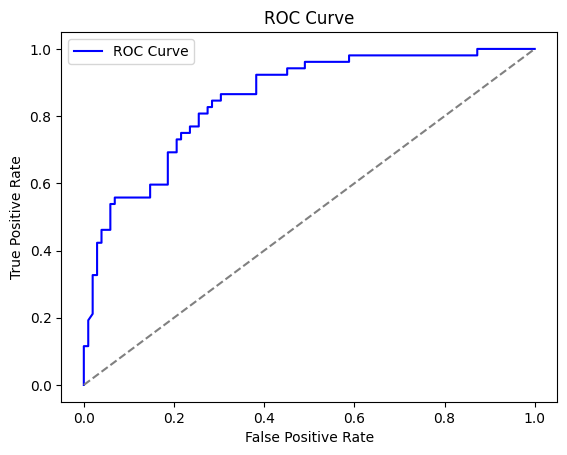

In [104]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [105]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC:", auc)

AUC: 0.8517156862745098
